<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [1]:
# Run this before everything
!pip install --upgrade --q tensorflow

     |████████████████████████████████| 421.8MB 29kB/s 
     |████████████████████████████████| 450kB 60.7MB/s 
     |████████████████████████████████| 3.9MB 65.5MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


In [0]:
from google.colab import drive
import pandas as pd
from pandas import read_csv, to_datetime
import numpy as np
from numpy import array,hstack
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = 10, 5
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime


In [3]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [0]:
# Import the dataset
drop = ['kVAR', 'kW', 'kWh Value','kVARh Value','kWh Actual', 'Max kW','Period', 'No Of Meters', 'kWh Estimate', 'TOU Demand kW', 'TOU Demand kVA', 'PF', 'CO2']

dataset2018 = read_csv(r'2018_Armidale.csv', header = 0).drop(columns = drop).rename(columns = {"Minimum Temperature": "Temp"}).dropna() # Take into account DST
dataset2019 = read_csv(r'2019_Armidale.csv', header = 0).drop(columns = drop).rename(columns = {"Minimum Temperature": "Temp"}).dropna()
dataset2017 = read_csv(r'2017_Armidale.csv', header = 0).drop(columns = drop).rename(columns = {"Minimum Temperature": "Temp"}).dropna()
datasetAll = pd.concat([dataset2017, dataset2018, dataset2019], axis=0, sort = False, ignore_index= True)

# Scalers for datasetAll.
s_demand = MinMaxScaler()
datasetAll['Demand kVA_s'] =  s_demand.fit_transform(datasetAll[['Demand kVA']])
datasetAll = datasetAll[['Demand kVA_s']].dropna()


In [0]:
datasetAll
su17 = datasetAll.loc[0:5663]
au17 = datasetAll.loc[5664:14495]
wi17 = datasetAll.loc[14496:23327]
sp17 = datasetAll.loc[23328:32059]
su18 = datasetAll.loc[32060:40699]
au18 = datasetAll.loc[40700:49531]
wi18 = datasetAll.loc[49532:58363]
sp18 = datasetAll.loc[58364:67095]
su19 = datasetAll.loc[67096:75735]
au19 = datasetAll.loc[75736: 84567]
wi19 = datasetAll.loc[84568: 93399]
sp19 = datasetAll.loc[93400:102131]
su20 = datasetAll.loc[102132:]

In [8]:
def split_dataset(dataset, fraction = 0.7):
  ## Split the dataset into train and test set ##
  train_size = int(len(dataset) * fraction)
  test_size = len(dataset) - train_size
  train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  return train_data, test_data

def split_sequence(sequence, n_steps_in, n_steps_out):
	## Split a univariate sequence into samples ##
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import *
print(tensorflow.__version__)

2.1.0


In [0]:
n_steps_in= 60
n_steps_out = 60

# split dataset into train and test set
train, test = split_dataset(sp17.append(sp18, ignore_index= True).values,fraction =1)#.append(su19, ignore_index = False).values, fraction = 1)#""".values"""
# split into samples
X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)
X_test, y_test = split_sequence(sp19.values, n_steps_in, n_steps_out)


Train on 13876 samples, validate on 3469 samples
Epoch 1/100
13876/13876 - 35s - loss: 0.0553 - val_loss: 0.0111
Epoch 2/100
13876/13876 - 31s - loss: 0.0227 - val_loss: 0.0112
Epoch 3/100
13876/13876 - 31s - loss: 0.0204 - val_loss: 0.0111
Epoch 4/100
13876/13876 - 31s - loss: 0.0200 - val_loss: 0.0112
Epoch 5/100
13876/13876 - 31s - loss: 0.0192 - val_loss: 0.0110
Epoch 6/100
13876/13876 - 31s - loss: 0.0184 - val_loss: 0.0107
Epoch 7/100
13876/13876 - 31s - loss: 0.0173 - val_loss: 0.0106
Epoch 8/100
13876/13876 - 37s - loss: 0.0166 - val_loss: 0.0106
Epoch 9/100
13876/13876 - 31s - loss: 0.0158 - val_loss: 0.0107
Epoch 10/100
13876/13876 - 32s - loss: 0.0155 - val_loss: 0.0104
Epoch 11/100
13876/13876 - 32s - loss: 0.0156 - val_loss: 0.0106
Epoch 12/100
13876/13876 - 30s - loss: 0.0151 - val_loss: 0.0106
Epoch 13/100
13876/13876 - 30s - loss: 0.0151 - val_loss: 0.0106
Epoch 14/100
13876/13876 - 30s - loss: 0.0149 - val_loss: 0.0106
Epoch 15/100
13876/13876 - 30s - loss: 0.0148 - va

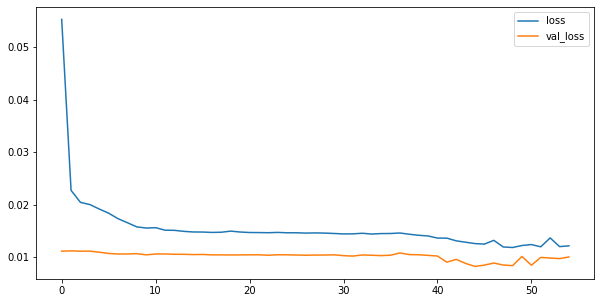

In [28]:
def build_model(X_train, y_train, X_test, y_test, n_steps_in, n_steps_out, epochs, verbose): 
  ## Build an LSTM model ##
    # Define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences= 1, input_shape=(n_steps_in, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(20, return_sequences= 0))
    model.add(Dropout(0.5))
    #model.add(LSTM(20, return_sequences = 0))
   
   
    #model.add(Dense(600))
    #model.add(Dense({{choice([120, 256, 512, 1024])}}))
    #model.add(LSTM(50, activation='relu', return_sequences= False))
    #model.add(Dropout(0.0001))
    #model.add(LSTM(100, activation='relu', return_sequences= False))
    #model.add(Dense(5))
    #model.add(LSTM(26, activation= 'relu'))
    #model.add(Dropout(0.01))
    model.add(Dense(n_steps_out)) 
    
    # Train Model
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose, validation_split= 0.2, shuffle = False ,callbacks = [EarlyStopping(patience = 10)])
    
    # Visualise Epoch
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()

    return model, history

model, history = build_model(X_train, y_train, X_test, y_test, n_steps_in = n_steps_in, n_steps_out = n_steps_out, epochs = 100, verbose = 2)

In [29]:
def RMSE(model, X_test, y_test, n_steps_out, scaler):
  y_hat = scaler.inverse_transform(model.predict(X_test))
  RMSE = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(y_hat.shape[0], y_hat.shape[1])), y_hat, multioutput= 'raw_values'))
  mean_RMSE = sum(RMSE)/ n_steps_out  
  return y_hat, RMSE, mean_RMSE
y_hat_train, train_RMSE, train_mean_RMSE =RMSE(model, X_train, y_train, n_steps_out, s_demand)
y_hat,RMSE, mean_RMSE = RMSE(model, X_test, y_test, n_steps_out, s_demand)
print("Train")
print(train_RMSE, train_mean_RMSE)
print("Test")
print(RMSE, mean_RMSE)

Train
[22.29562119 23.87915308 25.09003176 26.09014727 27.01322837 27.86310065
 28.64089719 29.40779882 30.14767926 30.84988912 31.49293338 32.07869936
 32.60188427 33.10803138 33.59503569 34.04235549 34.49735903 34.95794222
 35.40139268 35.84823461 36.29393516 36.70486452 37.10701141 37.52604455
 37.89661179 38.1828857  38.39868539 38.54698451 38.63433253 38.7389384
 38.88470414 39.04105286 39.17503609 39.27949156 39.317614   39.25011606
 39.16845849 39.18894317 39.32849964 39.54724302 39.76299763 39.97479403
 40.15935567 40.33137171 40.48329875 40.63734298 40.78866354 40.93621615
 41.04037144 41.16171397 41.26453625 41.31074133 41.36459486 41.40200108
 41.44992679 41.51727428 41.58554839 41.65580761 41.71122094 41.7718478 ] 36.65704154985959
Test
[26.29817982 27.44840441 28.29396899 28.94780434 29.63025789 30.33267071
 30.94078419 31.58150406 32.14227816 32.65045345 33.07730453 33.45633597
 33.80653262 34.15509493 34.4552637  34.72571603 35.0060224  35.25674112
 35.46842578 35.709194

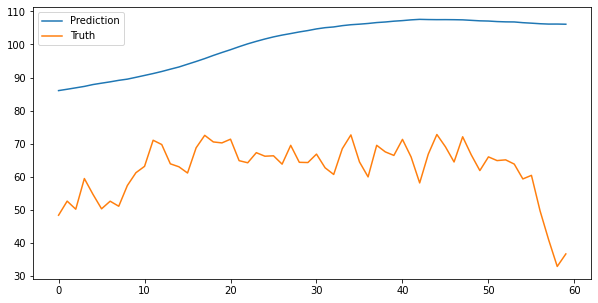

In [25]:
import random
def graphing(y_hat, y_test, scaler):
  i = random.randint(0, y_hat.shape[0])
  plt.plot(y_hat.reshape(y_hat.shape[0],y_hat.shape[1])[i], label = "Prediction")
  plt.plot(scaler.inverse_transform(y_test.reshape(y_hat.shape[0], y_hat.shape[1]))[i], label = "Truth")
  plt.legend()
  plt.show()

graphing(y_hat, y_test, s_demand)
  